In [1]:
import pandas as pd

## Get data from CSV

In [2]:
df = pd.read_csv("../data/mobile_de_detailed_new.csv")
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'link', 'link-href',
       'mileage_km', 'power', 'gearbox', 'previous_owners', 'category',
       'origin', 'cubic_capacity', 'fuel', 'basic_fuel_type',
       'energy_efficiency_class', 'n_seats', 'door_count', 'emission_class',
       'emission_sticker', 'first_registration', 'hu_val', 'climatisation',
       'parking_sensors', 'airbags', 'color_manufacturer', 'color',
       'interiro_design', 'price', 'price_type', 'seller_address',
       'seller_since', 'seller_languages', 'model', 'seller_rating',
       'seller_n_rating', 'vehicle_special_features', 'all_feature',
       'pagination', 'title', 'page_title', 'description'],
      dtype='object')

## Most popular brands

In [3]:
df.title.head()

0    Audi A6 2.8 FSI Start-Stopp XENON+SPORTSITZE+P...
1    Mercedes-Benz E 250 ELEGANCE | AUTOMAAT | LEDE...
2    Audi A4 Allroad 3.0 TDI qu ACC,SCHECKHEFT,KAME...
3                  Volkswagen Golf VII Comfortline BMT
4    Mercedes-Benz C 180 CGI Lim. BlueEfficiency Av...
Name: title, dtype: object

In [4]:
df['brand'] = df.title.str.split().str[0]
df['brand'].value_counts(normalize=True) * 100

Volkswagen       54.523227
Mercedes-Benz    21.271394
Audi             13.691932
BMW               9.290954
Skoda             0.244499
Ford              0.244499
Kia               0.244499
MINI              0.244499
Toyota            0.244499
Name: brand, dtype: float64

<AxesSubplot:ylabel='brand'>

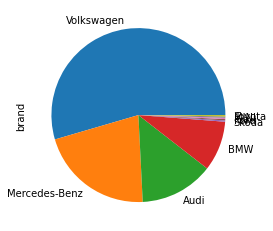

In [5]:
df['brand'].value_counts(normalize=True).plot.pie()

### Export the data to csv to plot using canva

In [6]:
df['brand'].value_counts(normalize=True).to_csv("../output_data/popular_brands.csv", index=False)

## Average price of cars

In [7]:
df.price.head()

0    €15,960
1    €22,500
2    €21,880
3    €13,490
4    €14,490
Name: price, dtype: object

In [8]:
df['price_cleaned'] = (
    df.price
            .str.replace("€", "")
            .str.replace(",", "")
            .str.replace(".", "", regex=False)
            .astype(float)
)

<AxesSubplot:>

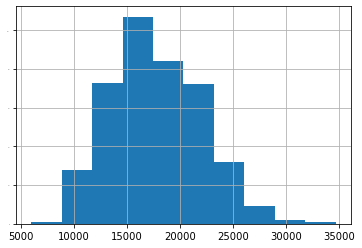

In [9]:
df.price_cleaned.hist(ylabelsize=0)

In [10]:
df.price_cleaned.median()

16999.0

### The median price is 16999 Eur

## Popular car colors

In [11]:
df.color.head()

0              Black
1     White Metallic
2    Silver Metallic
3      Blue Metallic
4    Silver Metallic
Name: color, dtype: object

In [12]:
# We want to keep Black and Black mettalic in same group.
df['color_cleaned'] = df.color.str.split().str[0]

In [13]:
df['color_cleaned'].value_counts(normalize=True) * 100

Black      30.521092
White      17.866005
Grey       17.866005
Silver     14.392060
Blue        9.429280
Brown       3.970223
Red         3.225806
Gold        0.744417
Schwarz     0.496278
Beige       0.496278
Orange      0.496278
Green       0.248139
Yellow      0.248139
Name: color_cleaned, dtype: float64

In [14]:
df['color_cleaned'].value_counts(normalize=True).to_csv("../output_data/car_color.csv", index=False)

## Car Types

In [15]:
df.category.value_counts(normalize=True) * 100

Saloon                                   35.207824
Estate Car                               19.804401
SUV / Off-road Vehicle / Pickup Truck    14.425428
Cabriolet / Roadster                     12.224939
Van / Minibus                             9.535452
Sports Car / Coupe                        6.112469
Small Car                                 1.466993
Other                                     0.977995
Limousine                                 0.244499
Name: category, dtype: float64

In [16]:
df.category.value_counts(normalize=True).to_csv("../output_data/car_type.csv", index=False)

## Manual vs Automatic

In [17]:
df.gearbox.value_counts(normalize=True)

Automatic transmission    0.615196
Manual gearbox            0.379902
Automatik                 0.002451
Schaltgetriebe            0.002451
Name: gearbox, dtype: float64

In [18]:
# some of them contain german names. Need to change it to english
df['gearbox'] = (
    df.gearbox
              .str.replace("Automatik", "Automatic")
              .str.replace("Schaltgetriebe", "Manual")
              .str.split().str[0]
)

In [19]:
df['gearbox'].value_counts(normalize=True)*100

Automatic    61.764706
Manual       38.235294
Name: gearbox, dtype: float64

### Percentage of Manual cars: 38%

## Petrol, Diesel, Gas or other fuels

In [20]:
df.fuel.value_counts(normalize=True)

Diesel                 0.474328
Petrol                 0.459658
Petrol, E10-enabled    0.063570
Benzin                 0.002445
Name: fuel, dtype: float64

In [21]:
df['fuel'] = (
    df.fuel
           .str.split().str[0]
           .str.replace("Benzin", "Petrol")
           .str.replace("Petrol,", "Petrol")
)

In [22]:
df.fuel.value_counts(normalize=True)

Petrol    0.525672
Diesel    0.474328
Name: fuel, dtype: float64

## Percentage of petrol cars: 53%

## What is the average km a car driven per day

In [23]:
# We need to use mileage_km and first_registration
df.mileage_km.head()

0    116.060 km
1    102.000 km
2     96.000 km
3     89.948 km
4     77.000 km
Name: mileage_km, dtype: object

In [24]:
df['mileage_km_cleaned'] = (
    df.mileage_km
                 .str.split().str[0]
                 .str.replace(".", "", regex=False)
                 .astype(int)
    
)

In [25]:
df['mileage_km_cleaned'].head()

0    116060
1    102000
2     96000
3     89948
4     77000
Name: mileage_km_cleaned, dtype: int64

### For days the car was driven, we need to subtract registration from current day

In [26]:
df.first_registration.head()

0    12/2012
1    07/2014
2    09/2013
3    04/2014
4    05/2011
Name: first_registration, dtype: object

In [27]:
df['first_registration'] = df.first_registration.astype("datetime64")

In [28]:
current_date = pd.to_datetime("2022-11-27")
df['days_old'] = (current_date - df['first_registration']).dt.days

In [29]:
df['days_old'].head()

0    3648
1    3071
2    3374
3    3162
4    4228
Name: days_old, dtype: int64

In [30]:
df['km_per_day'] = df['mileage_km_cleaned'] / df['days_old']

In [31]:
df['km_per_day'].median()

27.50212645307627

### Car driven in average: 27 km per day

## Average ownership of car

In [32]:
df.previous_owners.value_counts(normalize=True)

2.0    0.570447
1.0    0.298969
3.0    0.113402
4.0    0.010309
0.0    0.006873
Name: previous_owners, dtype: float64

In [33]:
df['average_ownership'] = df.days_old / df.previous_owners

In [34]:
df['average_ownership'].median()

1824.0

### Average ownwership = 1824 days == 5 years

## How many cars are accident_free?

In [35]:
df['is_accident_free'] = df.description.str.lower().str.contains("accident-free")

In [36]:
df['is_accident_free'].value_counts(normalize=True)

False    0.503667
True     0.496333
Name: is_accident_free, dtype: float64

### Almost half of the cars are accident free